In [ ]:
!pip -q install vit_keras
!pip -q  install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 9.2 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
mpox_model_WEIGHTS_PATH = '<add-weight-path-here>'

In [10]:
import tensorflow as tf
from vit_keras import vit
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Constants
IMAGE_SIZE = 384
mpox_model_class_names = ['MPOX', 'Normal', 'Other']


def create_mpox_model():
    vit_model = vit.vit_b16(
        image_size=IMAGE_SIZE,
        activation='softmax',
        pretrained=True,
        include_top=False,
        pretrained_top=False
    )

    model = tf.keras.Sequential([
        vit_model,
        Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        Dense(3, activation='softmax')
    ])

    return model

mpox_model = create_mpox_model()
mpox_model.load_weights(mpox_model_WEIGHTS_PATH)

def mpox_predict(image_path, model, IMAGE_SIZE, true_class):
    img = image.load_img(image_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    image_np_resized_normalized = np.vstack([img_batch]) / 255.0

    probabilities = model.predict(image_np_resized_normalized)
    class_index = np.argmax(probabilities)
    class_label = mpox_model_class_names[class_index]

    return img, class_label, true_class

def plot_predictions(folder_path, model, IMAGE_SIZE, diseases_model_class_names , true_class):
    images, predicted_labels, true_labels = [], [], []
    for img_file in os.listdir(folder_path):
        if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(folder_path, img_file)
            img, pred_label, true_label = mpox_predict(img_path, model, IMAGE_SIZE, true_class)
            images.append(img)
            predicted_labels.append(pred_label)
            true_labels.append(true_label)

    num_images = len(images)
    cols = 3
    rows = num_images // cols + (num_images % cols > 0)

    plt.figure(figsize=(cols * 4, rows * 4))
    for i, (img, pred_label, true_label) in enumerate(zip(images, predicted_labels, true_labels)):
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.title(f'Pred: {pred_label}\nTrue: {true_label}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 3s 3s/step


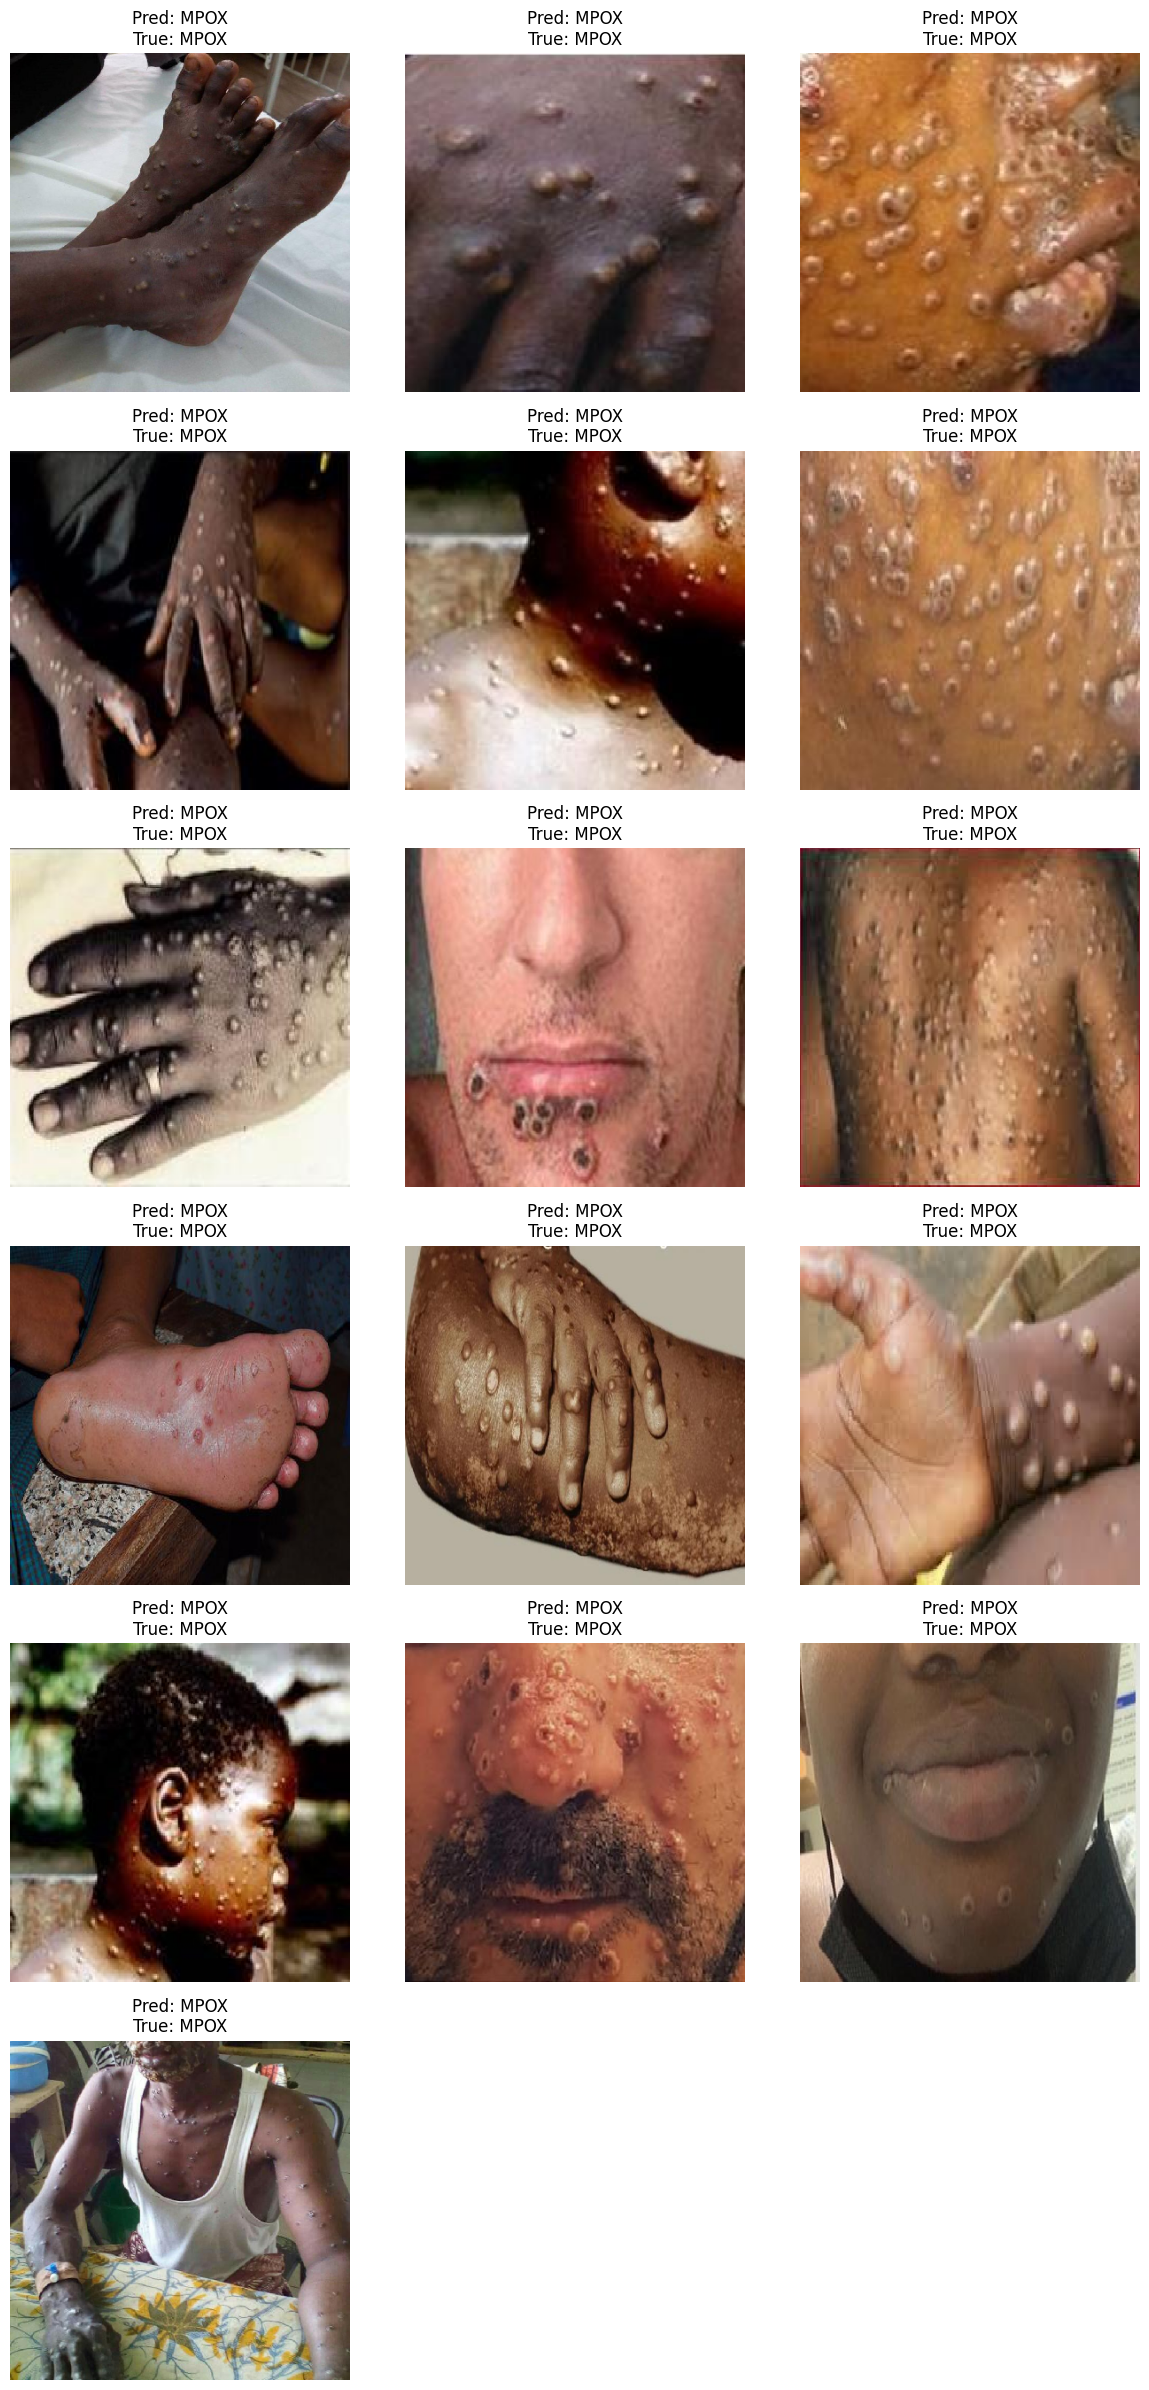

In [12]:
# path to your image
folder_path = '<Mpox-folder-path>'
true_class = "MPOX"
plot_predictions(folder_path, mpox_model, IMAGE_SIZE, mpox_model, true_class)

1/1 [==============================] - 3s 3s/step


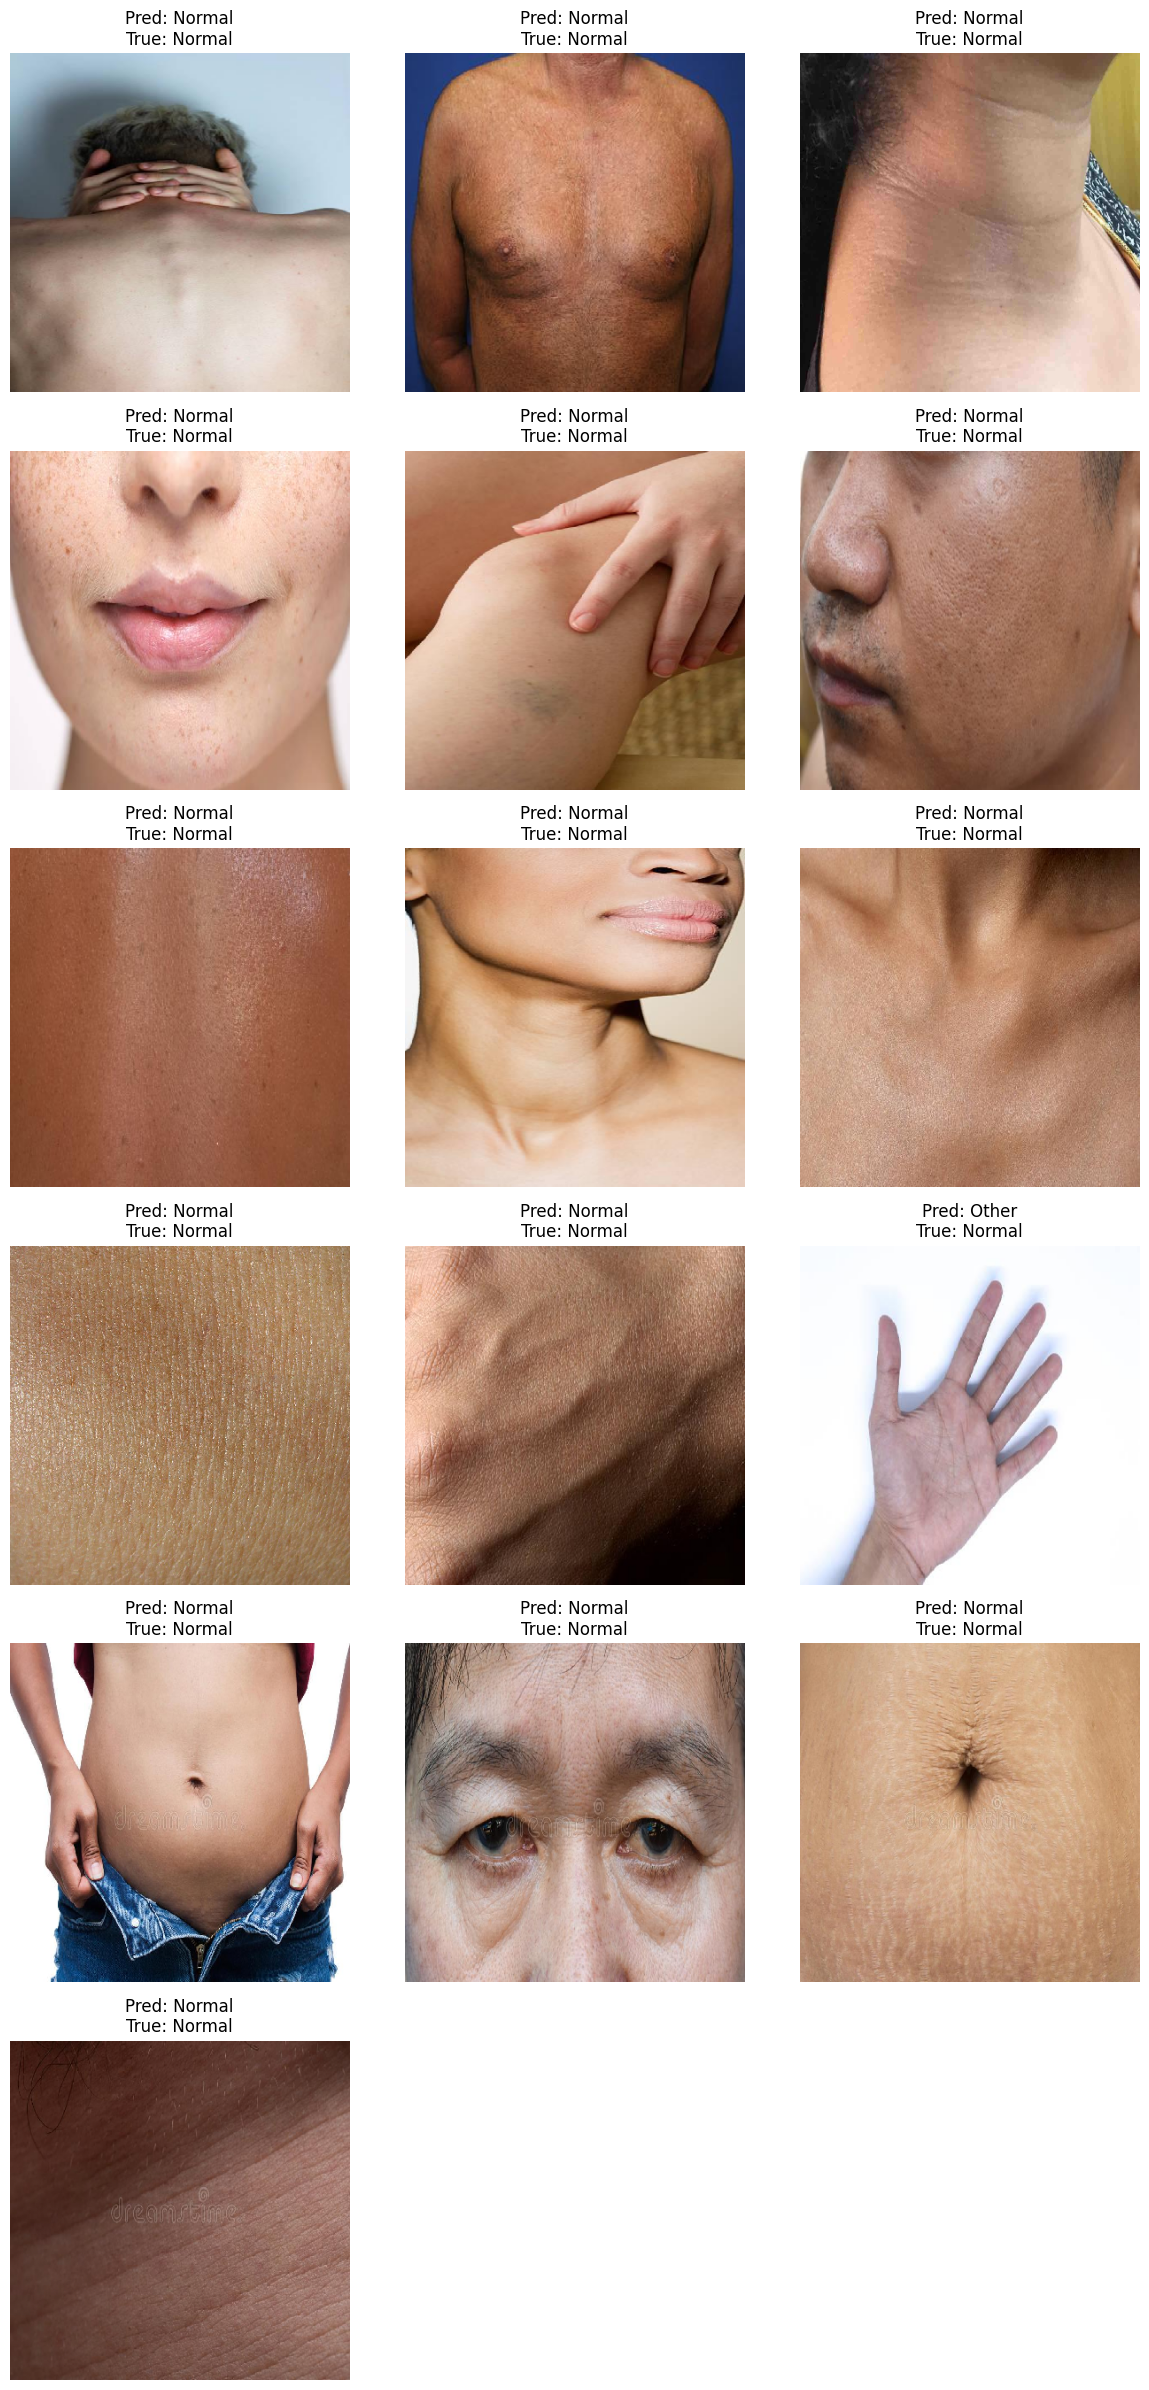

In [13]:
# path to your image
folder_path = '<Normal-folder-path>'
true_class = "Normal"
plot_predictions(folder_path, mpox_model, IMAGE_SIZE, mpox_model, true_class)

1/1 [==============================] - 3s 3s/step


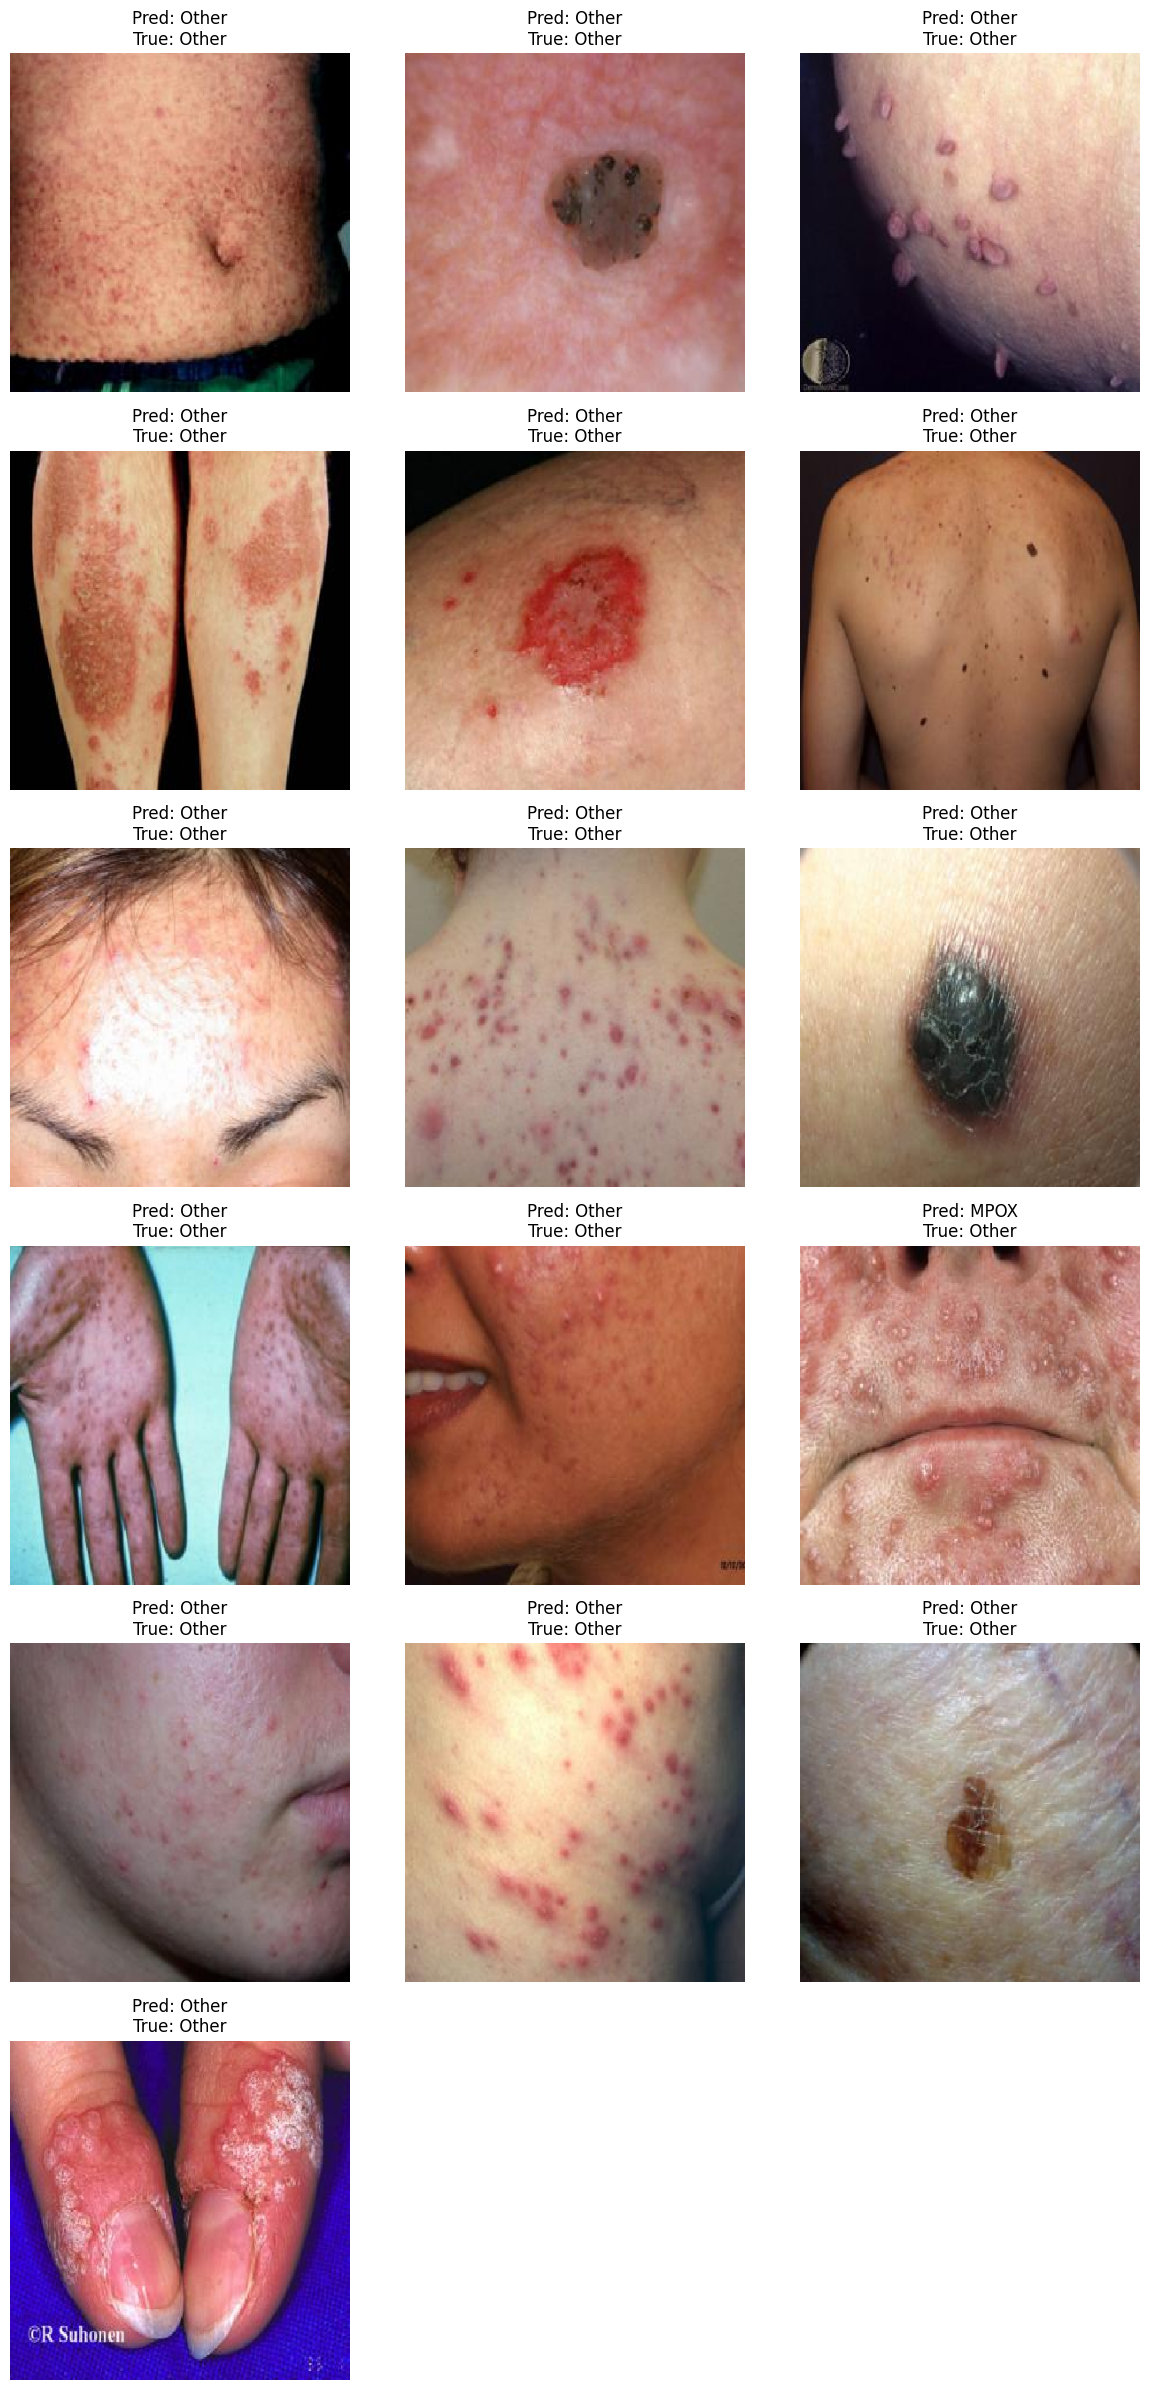

In [14]:
# path to your image
folder_path = '<Other-folder-path>'
true_class = "Other"
plot_predictions(folder_path, mpox_model, IMAGE_SIZE, mpox_model, true_class)